In [20]:
from scipy import datasets
import matplotlib.pyplot as plt

%matplotlib inline

img = datasets.face()

img[:, :, 0].shape

(768, 1024)

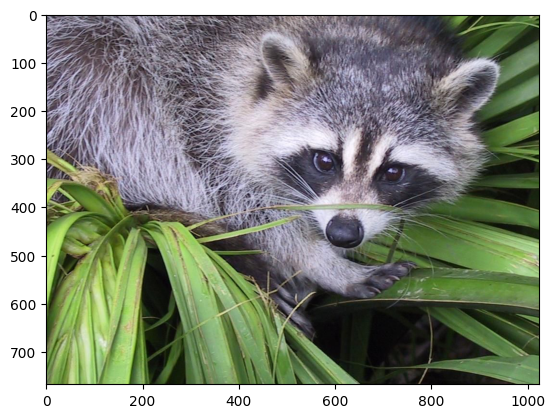

In [21]:
plt.imshow(img, cmap)
plt.show()

In [22]:
img.max(), img.min()
img.dtype

dtype('uint8')

In [23]:
img_scale = img/255
img_scale.dtype

dtype('float64')

In [24]:
red_array = img[:, :, 0]
green_array = img[:, :, 1]
blue_array = img[:, :, 2]

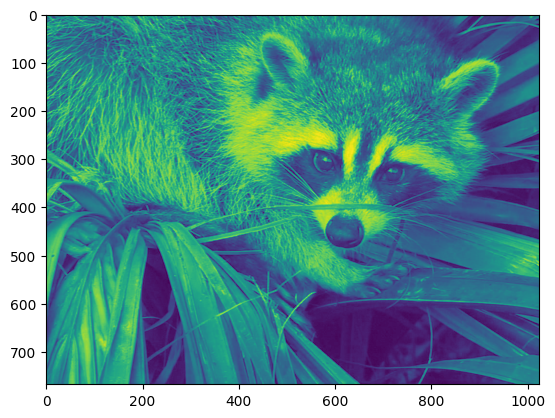

In [25]:
plt.imshow(red_array)
plt.show()

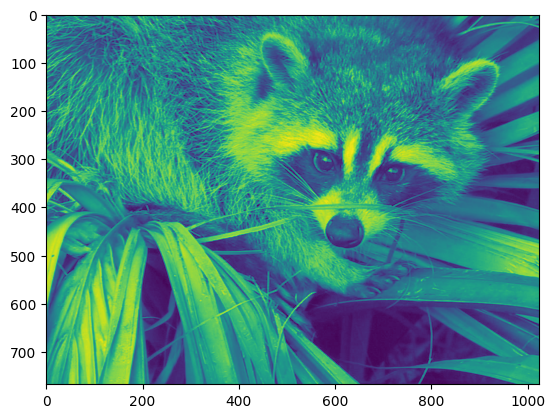

In [26]:
plt.imshow(green_array)
plt.show()

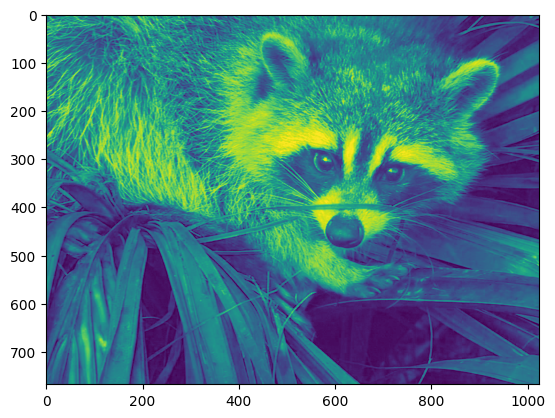

In [27]:
plt.imshow(blue_array)
plt.show()